In [25]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
# grafica dentro del cuardernillo
%matplotlib inline

In [26]:
import pandas as pd
# es para cambiar los datos categorizados a numericos
from sklearn.preprocessing import LabelEncoder
#from datetime import datetime

In [27]:
#Carga de dataset
data = pd.read_csv('/content/wfp_food_prices_ind.csv')

In [28]:
print(data)

              date       admin1          admin2     market   latitude  \
0       1994-01-15        Delhi           Delhi      Delhi  28.666667   
1       1994-01-15        Delhi           Delhi      Delhi  28.666667   
2       1994-01-15        Delhi           Delhi      Delhi  28.666667   
3       1994-01-15        Delhi           Delhi      Delhi  28.666667   
4       1994-01-15      Gujarat       Ahmadabad  Ahmedabad  23.033333   
...            ...          ...             ...        ...        ...   
172012  2022-07-15  West Bengal  West Midnapore  Kharagpur  22.339330   
172013  2022-07-15  West Bengal  West Midnapore  Kharagpur  22.339330   
172014  2022-07-15  West Bengal  West Midnapore  Kharagpur  22.339330   
172015  2022-07-15  West Bengal  West Midnapore  Kharagpur  22.339330   
172016  2022-07-15  West Bengal  West Midnapore  Kharagpur  22.339330   

        longitude               category        commodity unit priceflag  \
0       77.216667     cereals and tubers       

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  object 
 1   admin1     171228 non-null  object 
 2   admin2     171228 non-null  object 
 3   market     172017 non-null  object 
 4   latitude   171228 non-null  float64
 5   longitude  171228 non-null  float64
 6   category   172017 non-null  object 
 7   commodity  172017 non-null  object 
 8   unit       172017 non-null  object 
 9   priceflag  172017 non-null  object 
 10  pricetype  172017 non-null  object 
 11  currency   172017 non-null  object 
 12  price      172017 non-null  float64
 13  usdprice   172017 non-null  float64
dtypes: float64(4), object(10)
memory usage: 18.4+ MB


In [31]:
columna_eliminar = ['priceflag','currency','usdprice']
data.drop(columna_eliminar, axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  object 
 1   admin1     171228 non-null  object 
 2   admin2     171228 non-null  object 
 3   market     172017 non-null  object 
 4   latitude   171228 non-null  float64
 5   longitude  171228 non-null  float64
 6   category   172017 non-null  object 
 7   commodity  172017 non-null  object 
 8   unit       172017 non-null  object 
 9   pricetype  172017 non-null  object 
 10  price      172017 non-null  float64
dtypes: float64(3), object(8)
memory usage: 14.4+ MB


In [33]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [34]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [35]:
print(data)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   342      30     156      81  22.339330  87.226720         4   
172013   342      30     156      81  22.339330  87.226720         4   
172014   342      30     156      81  22.339330  87.226720         4   
172015   342      30     156      81  22.339330  87.226720         5   
172016   342      30     156      81  22.339330  87.226720         5   

        commodity  unit  pricetype   price  
0              15     1          0    8.00  
1              21     1          0    5.00  


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  int64  
 1   admin1     172017 non-null  int64  
 2   admin2     172017 non-null  int64  
 3   market     172017 non-null  int64  
 4   latitude   171228 non-null  float64
 5   longitude  171228 non-null  float64
 6   category   172017 non-null  int64  
 7   commodity  172017 non-null  int64  
 8   unit       172017 non-null  int64  
 9   pricetype  172017 non-null  int64  
 10  price      172017 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 14.4 MB


In [37]:
#llenar datos vacios
columnas_especificas = ['latitude', 'longitude']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       172017 non-null  int64  
 1   admin1     172017 non-null  int64  
 2   admin2     172017 non-null  int64  
 3   market     172017 non-null  int64  
 4   latitude   172017 non-null  float64
 5   longitude  172017 non-null  float64
 6   category   172017 non-null  int64  
 7   commodity  172017 non-null  int64  
 8   unit       172017 non-null  int64  
 9   pricetype  172017 non-null  int64  
 10  price      172017 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 14.4 MB


In [40]:
# Lectura de Datos
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [41]:
print(X)
print('*'*25)
print(y)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   342      30     156      81  22.339330  87.226720         4   
172013   342      30     156      81  22.339330  87.226720         4   
172014   342      30     156      81  22.339330  87.226720         4   
172015   342      30     156      81  22.339330  87.226720         5   
172016   342      30     156      81  22.339330  87.226720         5   

        commodity  unit  pricetype  
0              15     1          0  
1              21     1          0  
2              17     1 

In [42]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [43]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   342      30     156      81  22.339330  87.226720         4   
172013   342      30     156      81  22.339330  87.226720         4   
172014   342      30     156      81  22.339330  87.226720         4   
172015   342      30     156      81  22.339330  87.226720         5   
172016   342      30     156      81  22.339330  87.226720         5   

        commodity  unit  pricetype  
0              15     1          0  
1              21     1          0  
2              17     1 

In [44]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [45]:
print(X)

[[ 1.         -4.6439721  -1.15182442 ...  0.42944113 -0.15521273
  -0.11582156]
 [ 1.         -4.6439721  -1.15182442 ...  1.37454456 -0.15521273
  -0.11582156]
 [ 1.         -4.6439721  -1.15182442 ...  0.74447561 -0.15521273
  -0.11582156]
 ...
 [ 1.          0.97419289  1.59939443 ... -1.14573126 -0.15521273
  -0.11582156]
 [ 1.          0.97419289  1.59939443 ...  0.11440665 -0.15521273
  -0.11582156]
 [ 1.          0.97419289  1.59939443 ...  1.21702732 -0.15521273
  -0.11582156]]


In [46]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [47]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 93.58380643  26.99705835   0.60666039  -0.81990175  -1.18142968
  -2.82416121  -1.80782034   0.81740962 -18.91390202 -19.57570364
 198.09230662]
El valor predecido es (usando el descenso por el gradiente): -62.0912


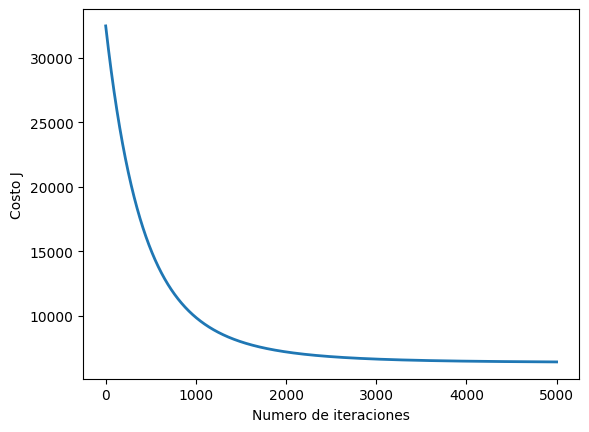

In [49]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 0, 6, 39, 42, 28.666667, 77.216667, 0, 15, 1, 0]
X_array[1:11] = (X_array[1:11] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [50]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('food_prices.csv', index=False)

print("Archivo 'food_prices.csv' creado exitosamente.")

Archivo 'food_prices.csv' creado exitosamente.


In [51]:
#Carga de dataset
data = pd.read_csv('/content/food_prices.csv')

In [52]:
print(data)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   342      30     156      81  22.339330  87.226720         4   
172013   342      30     156      81  22.339330  87.226720         4   
172014   342      30     156      81  22.339330  87.226720         4   
172015   342      30     156      81  22.339330  87.226720         5   
172016   342      30     156      81  22.339330  87.226720         5   

        commodity  unit  pricetype   price  
0              15     1          0    8.00  
1              21     1          0    5.00  


In [54]:
# Lectura de Datos
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [55]:
print(X)
print('*'*25)
print(y)

        date  admin1  admin2  market   latitude  longitude  category  \
0          0       6      39      42  28.666667  77.216667         0   
1          0       6      39      42  28.666667  77.216667         0   
2          0       6      39      42  28.666667  77.216667         2   
3          0       6      39      42  28.666667  77.216667         3   
4          0       8       2       3  23.033333  72.616667         0   
...      ...     ...     ...     ...        ...        ...       ...   
172012   342      30     156      81  22.339330  87.226720         4   
172013   342      30     156      81  22.339330  87.226720         4   
172014   342      30     156      81  22.339330  87.226720         4   
172015   342      30     156      81  22.339330  87.226720         5   
172016   342      30     156      81  22.339330  87.226720         5   

        commodity  unit  pricetype  
0              15     1          0  
1              21     1          0  
2              17     1 

In [56]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [57]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [58]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 0, 6, 39, 42, 28.666667, 77.216667, 0, 15, 1, 0]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 2.30957178e+01  4.57645168e-01  1.60285705e-01 -3.59120718e-02
 -7.19054506e-03 -4.23386472e-01 -2.30065462e-01  4.46543497e+00
 -2.09760918e+00 -3.72104195e+01  1.81720649e+03]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $-76
